## Exploring the training and testing images

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import img_to_array
import glob
from PIL import Image

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [111]:
TEST_PATH = 'Data/Test/'

In [125]:
test_images_df = pd.read_csv('test_dir_df')
test_images_df.drop(columns=['Unnamed: 0'], inplace=True)
test_images_df.head()

,file_name,id,category_id
0,inaturalist_2018/Mammalia/4070/1d411dee89eb912...,98,150
1,inaturalist_2018/Aves/3832/c810190332ee99ffd5d...,204,563
2,inaturalist_2018/Mammalia/4097/36fcaf8dc563eb1...,261,133
3,inaturalist_2018/Mammalia/4079/569ade1c2d0c46c...,412,422
4,inaturalist_2018/Mammalia/4082/8bc7da4af86153c...,508,371


In [113]:
TRAIN_PATH = 'Data/train/' ##7655 images

In [114]:
train_df = pd.read_csv('directory_df')
train_df.drop(columns=['Unnamed: 0'], inplace=True)
train_df.drop(columns=['height', 'width','id','image_id'], inplace=True)

In [115]:
train_df.head()

,file_name,category_id
0,inaturalist_2017/Mammalia/Papio anubis/df40033...,78
1,inaturalist_2017/Mammalia/Papio anubis/3b3aa62...,78
2,inaturalist_2017/Mammalia/Papio anubis/8ae2d15...,78
3,inaturalist_2017/Mammalia/Papio anubis/9e58e4f...,78
4,inaturalist_2017/Mammalia/Papio anubis/5a19154...,78


In [116]:
train_df['category_id'] = train_df['category_id'].astype('str')

#### Creating subset of images 

training subset

In [117]:
lst = ['8', '657', '570', '385']

In [118]:
subset_df = train_df.loc[train_df['category_id'].isin(lst), : ].copy()

In [119]:
subset_df['category_id'] = subset_df['category_id'].map({val:str(i) for i,val in enumerate(lst)})

In [120]:
subset_df['category_id'].value_counts()

0    149
1    137
2    118
3    115
Name: category_id, dtype: int64

In [121]:
subset_df.head()

,file_name,category_id
3396,inaturalist_2017/Aves/Ortalis vetula/1a0f592c6...,3
3397,inaturalist_2017/Aves/Ortalis vetula/aed521ce5...,3
3398,inaturalist_2017/Aves/Ortalis vetula/987bde778...,3
3399,inaturalist_2017/Aves/Ortalis vetula/88df16259...,3
3400,inaturalist_2017/Aves/Ortalis vetula/cfb8067a7...,3


testing subset -- this data isn't augmented but I can visulize these images to compare they are the same as the training data

In [133]:
test_images_df.head()

,file_name,id,category_id
0,inaturalist_2018/Mammalia/4070/1d411dee89eb912...,98,150
1,inaturalist_2018/Aves/3832/c810190332ee99ffd5d...,204,563
2,inaturalist_2018/Mammalia/4097/36fcaf8dc563eb1...,261,133
3,inaturalist_2018/Mammalia/4079/569ade1c2d0c46c...,412,422
4,inaturalist_2018/Mammalia/4082/8bc7da4af86153c...,508,371


In [134]:
lst = ['8', '657', '570', '385']

In [135]:
test_images_df['category_id'] = test_images_df['category_id'].astype('str')

In [136]:
subset_test_df = test_images_df.loc[test_images_df['category_id'].isin(lst), : ].copy()

In [137]:
subset_test_df['category_id'] = subset_test_df['category_id'].map({ val:str(i) for i,val in enumerate(lst)})

In [138]:
subset_test_df.head()

,file_name,id,category_id
8,inaturalist_2018/Aves/3200/88088cdadc00f08b0c8...,591,2
17,inaturalist_2018/Mammalia/4075/ffb376615bfc2b4...,1142,0
20,inaturalist_2018/Aves/3730/7826126a17dd37045cf...,1340,1
31,inaturalist_2018/Aves/3730/ac2434cc227e63f4e79...,2016,1
45,inaturalist_2018/Aves/3730/23c0cd71cc867c46c57...,3855,1


In [143]:
subset_test_df['category_id'] = subset_test_df['category_id'].astype(int)

#### Visualizing Images from Training and Testing subsets

I will only pick maybe 2 category_ids per training and testing subset

In [144]:
root_dir = 'Data/Test/'

In [162]:
## code from Utpal Rudra

def visualize_image_grid(rows, cols):
    """Visualize random grid of images with the first category."""
    filenames = subset_test_df['file_name']
    
    np.random.seed(42)
    img_idx = np.random.randint(len(filenames), size=rows * cols)
    
    fig, axs = plt.subplots(rows, cols, figsize=(16,16))
    
    for r in range(rows):
        for c in range(cols):
            # get the image and image id
            filename = filenames[img_idx[rows*r + c]]
            img_id = filename.split('.')[0]
            # get the category
            #category_id = get_first_category(img_id)

            
            img = Image.open(root_dir + filename)
            
            axs[r,c].imshow(img)
            axs[r,c].axis('off')
            #axs[r,c].set_title('{}'.format(category_id))
            
    plt.suptitle('Test Images', fontsize=16)
    plt.show()

KeyError: 102

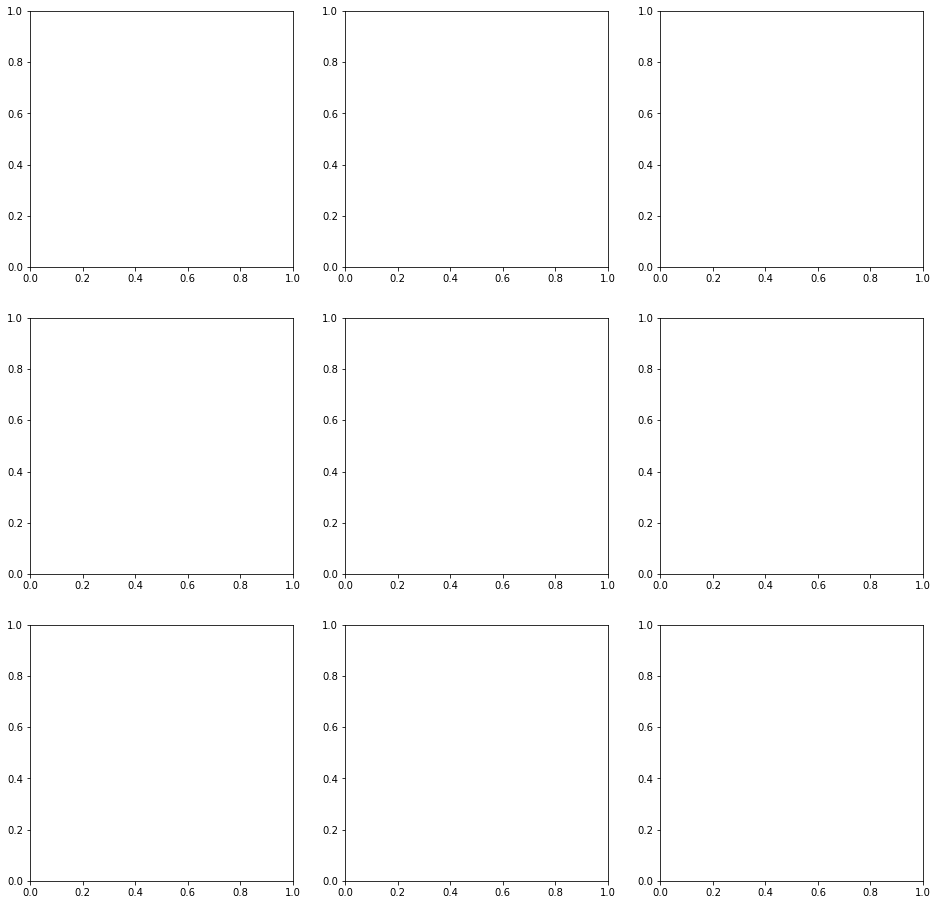

In [163]:
#visualize_image_grid(3,3)

In [159]:
def visualize_cetagory(category_id, rows=3, cols=3, seed=42):
    """Function to visualize images of a specific category."""
    # filter by the category_id
    copy = subset_test_df[subset_test_df.category_id == category_id]
    # get the category name
    #category_name = train_categories[train_categories.id == category_id].name.values[0]
    
    # get random indices
    np.random.seed(seed)
    img_idx = np.random.randint(len(copy), size=rows * cols)
    
    
    # plot images
    fig, axs = plt.subplots(rows, cols, figsize=(15,7))
    
    
    for r in range(rows):
        for c in range(cols):
            # get the image and image id
            filename = copy.iloc[img_idx[rows*r + c]]['id']#image_id + '.jpg'
            img_id = filename.split('.')[0]
            
            img = Image.open(root_dir + filename)
            
            axs[r,c].imshow(img)
            axs[r,c].axis('off')
            axs[r,c].set_title('{}'.format(category_id))
            
    plt.suptitle('Test images for {}'.format(category_id), fontsize=16)
    plt.show()

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U21'), dtype('<U21')) -> dtype('<U21')

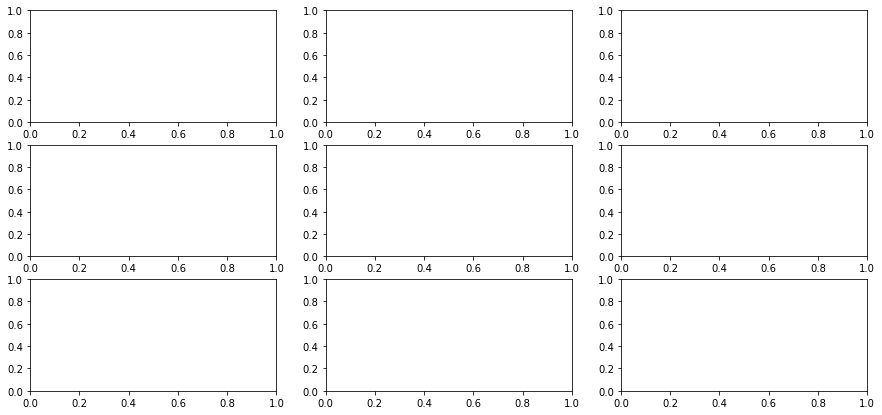

In [164]:
visualize_cetagory(1)

#### Visualizing the Augmented Images 

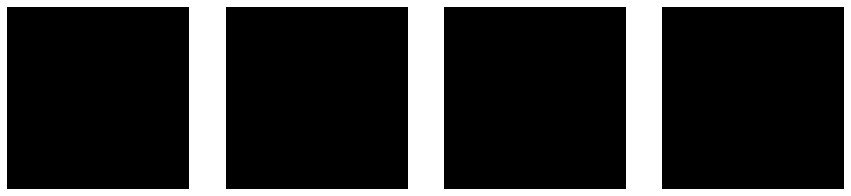

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,15))

for i in range(4):

  # convert to unsigned integers for plotting
  image = next(train_generator)[0].astype('uint8')

  # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
  image = np.squeeze(image)

  # plot raw pixel data
  ax[i].imshow(image) 
  ax[i].axis('off')